<a href="https://colab.research.google.com/github/ThatNinjaGuy/Machine-learning-A-Z-Course/blob/develop/marketing_engagement_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Marketing Egagements Predictor*

# Pre-processing Steps

## Import dependencies and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('SocialMediaPosts.csv')
X = dataset.iloc[:, [0,1,5]].values
y = dataset.iloc[:, -1].values

## Cleanup the imported text for the post description

In [3]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 412):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Post description'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('no')
  all_stopwords.remove('nor')
  all_stopwords.remove('but')
  all_stopwords.remove('very')
  all_stopwords.remove('and')
  review = [ ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
print(corpus)

['excit announc latest partnership xyzcompani togeth bring innov solut financi need partnership innov', 'join us live q session tomorrow pm est expert answer question person financ and invest strategi miss qanda financ', 'ceo john doe speak upcom tech summit futur digit bank stay tune updat and insight event techsummit digitalbank', 'look way save next vacat check latest blog post tip and trick travel budget budgettravel vacat', 'excit news mobil bank app updat new featur seamless bank experi download latest version today mobilebank updat', 'want learn invest stock market join free webinar next week expert advic and strategi regist stockmarket invest', 'introduc new reward program earn point everi transact and redeem excit reward sign today reward loyaltyprogram', 'question retir plan financi advisor help schedul consult today retirementplan financialadvic', 'celebr year serv custom thank trust and loyalti mani year togeth anniversari mileston', 'plan child educ educ save plan help ach

In [5]:
X_cleaned = X.copy()
X_cleaned[:, 0] = corpus

In [6]:
print(X_cleaned)

[['excit announc latest partnership xyzcompani togeth bring innov solut financi need partnership innov'
  964084 15434]
 ['join us live q session tomorrow pm est expert answer question person financ and invest strategi miss qanda financ'
  383253 20116]
 ['ceo john doe speak upcom tech summit futur digit bank stay tune updat and insight event techsummit digitalbank'
  110035 13026]
 ...
 ['interest stock stock market guid provid tip and strategi success invest download stockmarket invest'
  948406 21550]
 ['need help retir plan retir specialist help creat plan meet need contact us today retir financialplan'
  457593 15212]
 ['buy home mortgag option make easi find right loan budget appli mortgag homebuy'
  406270 19451]]


## Split the data into training and testing dataset

In [7]:
from sklearn.model_selection import train_test_split
# Dataset splitting should be done before feature scaling.
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size = 0.2, random_state = 1)

In [8]:
print(X_train)

[['need person loan loan offer flexibl term and competit rate appli onlin today personalloan financ'
  924758 9688]
 ['join us retir plan workshop learn secur financi futur and enjoy retir regist retirementplan workshop'
  12782 14389]
 ['stay inform latest financi news and trend blog read expert insight and advic today financialnew blog'
  151252 13503]
 ['readi dream vacat vacat save account help save next getaway open account today vacationsav dreamvac'
  988395 7461]
 ['start plan retir retir plan servic advisor help creat plan fit need retirementplan financialadvisor'
  282156 17156]
 ['get tax done right tax prepar servic expert help maxim refund schedul appoint tax taxprep'
  213328 17797]
 ['start plan retir retir plan servic advisor help creat plan fit need retirementplan financialadvisor'
  743616 12420]
 ['know busi bank servic design help manag financ and grow busi learn today businessbank financialservic'
  74634 10231]
 ['interest stock stock market guid provid tip and st

## Visualizing the raw data

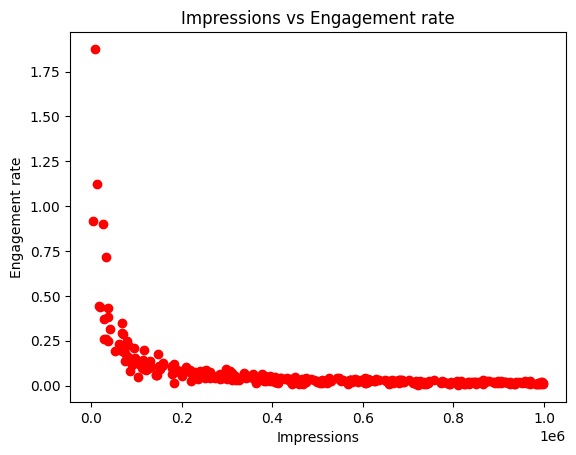

In [9]:
plt.scatter(X_train[:, 1], y_train, c='red')
plt.title('Impressions vs Engagement rate')
plt.xlabel('Impressions')
plt.ylabel('Engagement rate')
plt.show()

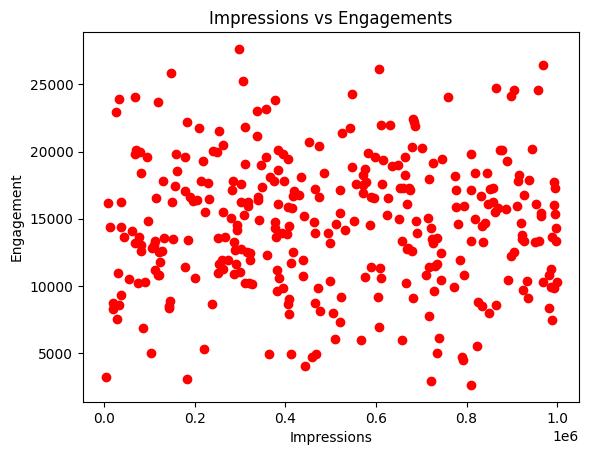

In [10]:
plt.scatter(X_train[:, 1], X_train[:, 2], c='red')
plt.title('Impressions vs Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagement')
plt.show()

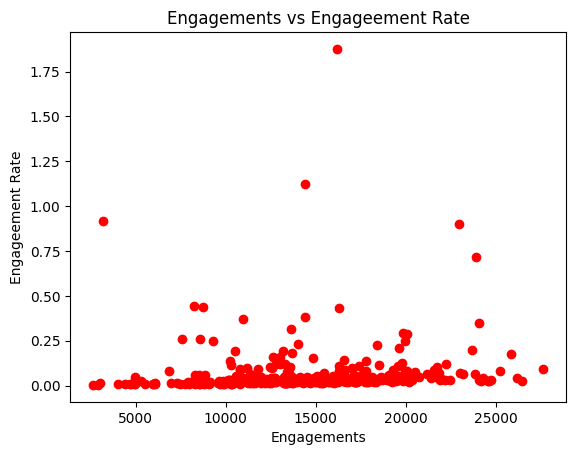

In [11]:
plt.scatter(X_train[:, 2], y_train, c='red')
plt.title('Engagements vs Engageement Rate')
plt.xlabel('Engagements')
plt.ylabel('Engageement Rate')
plt.show()

# Model Experiementation

## Multiple linear regression to predict engagement rate based on usage metrics

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train[:, 1:], y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test[:, 1:])
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.35e-02  1.25e-02]
 [ 2.14e-02  2.83e-02]
 [ 4.75e-02  2.29e-02]
 [ 8.66e-02  3.13e-02]
 [ 1.93e-01  4.53e-01]
 [ 1.92e-02  1.48e-02]
 [ 1.80e-01  1.97e-01]
 [ 1.61e-01  1.04e-01]
 [ 1.91e-01  9.61e-01]
 [ 3.36e-02  2.17e-02]
 [ 3.92e-02  3.14e-02]
 [ 1.05e-01  5.28e-02]
 [ 1.31e-02  1.61e-02]
 [ 1.15e-01  5.57e-02]
 [ 1.32e-01  6.00e-02]
 [-2.34e-02  2.27e-02]
 [ 1.15e-01  5.20e-02]
 [ 4.63e-03  1.94e-02]
 [ 1.46e-01  7.74e-02]
 [-1.76e-02  2.01e-02]
 [ 4.24e-02  1.50e-02]
 [-2.41e-02  5.77e-03]
 [ 1.20e-01  5.60e-02]
 [ 3.27e-02  1.69e-02]
 [ 1.94e-01  3.02e-01]
 [ 9.65e-03  2.42e-02]
 [ 7.07e-02  2.90e-02]
 [ 1.87e-01  1.84e-01]
 [ 7.17e-02  3.14e-02]
 [ 1.25e-01  6.56e-02]
 [ 1.42e-01  7.56e-02]
 [-3.29e-02  1.92e-02]
 [ 1.38e-02  1.63e-02]
 [-3.35e-03  2.07e-02]
 [ 1.72e-02  3.11e-03]
 [ 1.40e-01  7.52e-02]
 [ 1.07e-01  4.15e-02]
 [ 1.82e-01  2.75e-01]
 [-7.38e-03  2.23e-02]
 [ 6.13e-02  3.17e-02]
 [ 3.23e-02  2.41e-02]
 [ 1.22e-01  5.58e-02]
 [ 4.13e-02  2.78e-02]
 [ 1.80e-01

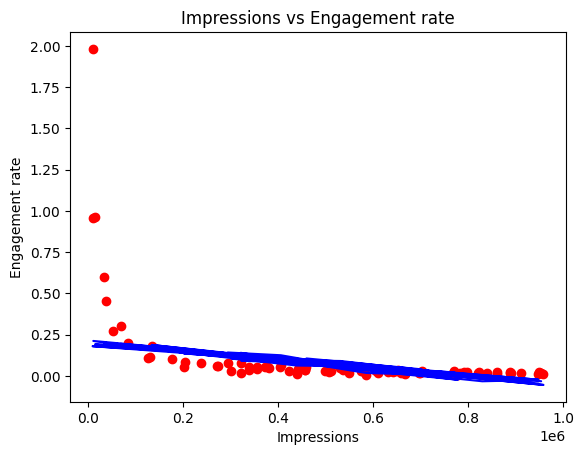

In [14]:
plt.scatter(X_test[:, 1], y_test, c='red')
plt.plot(X_test[:, 1], y_pred, c='blue')
plt.title('Impressions vs Engagement rate')
plt.xlabel('Impressions')
plt.ylabel('Engagement rate')
plt.show()

## Polynomial regression on usage data for engagement rate

In [15]:
from sklearn.preprocessing import PolynomialFeatures
# Modifying the degree results in the better calulations as more degrees of powers of a metric is applied
# This can be fine tuned based on complexity and time of computation
# This can lead to overfitting as well, if it is optimized too much
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train[:, 1:])

In [16]:
lin_pol_reg = LinearRegression()
lin_pol_reg.fit(X_poly, y_train)

LinearRegression()

In [17]:
y_pred = lin_pol_reg.predict(poly_reg.transform(X_test[:, 1:]))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-3.48e-02  1.25e-02]
 [ 2.79e-02  2.83e-02]
 [ 2.69e-02  2.29e-02]
 [ 5.01e-02  3.13e-02]
 [ 5.15e-01  4.53e-01]
 [-1.14e-02  1.48e-02]
 [ 3.22e-01  1.97e-01]
 [ 1.46e-01  1.04e-01]
 [ 4.23e-01  9.61e-01]
 [ 2.24e-02  2.17e-02]
 [ 5.54e-02  3.14e-02]
 [ 9.76e-02  5.28e-02]
 [ 5.07e-03  1.61e-02]
 [ 2.72e-02  5.57e-02]
 [ 4.95e-02  6.00e-02]
 [-8.34e-02  2.27e-02]
 [ 6.40e-03  5.20e-02]
 [ 3.03e-02  1.94e-02]
 [ 6.82e-02  7.74e-02]
 [ 1.50e-02  2.01e-02]
 [-1.16e-03  1.50e-02]
 [ 8.84e-03  5.77e-03]
 [ 7.90e-03  5.60e-02]
 [ 5.68e-03  1.69e-02]
 [ 5.30e-01  3.02e-01]
 [ 4.13e-03  2.42e-02]
 [ 3.07e-02  2.90e-02]
 [ 2.01e-01  1.84e-01]
 [ 1.76e-02  3.14e-02]
 [ 1.20e-01  6.56e-02]
 [ 2.42e-02  7.56e-02]
 [-5.09e-03  1.92e-02]
 [ 6.50e-03  1.63e-02]
 [ 2.39e-02  2.07e-02]
 [ 5.98e-02  3.11e-03]
 [ 1.66e-02  7.52e-02]
 [ 4.41e-02  4.15e-02]
 [ 3.13e-01  2.75e-01]
 [-4.15e-03  2.23e-02]
 [ 7.51e-03  3.17e-02]
 [ 1.65e-02  2.41e-02]
 [ 1.29e-02  5.58e-02]
 [ 8.53e-03  2.78e-02]
 [ 2.15e-01

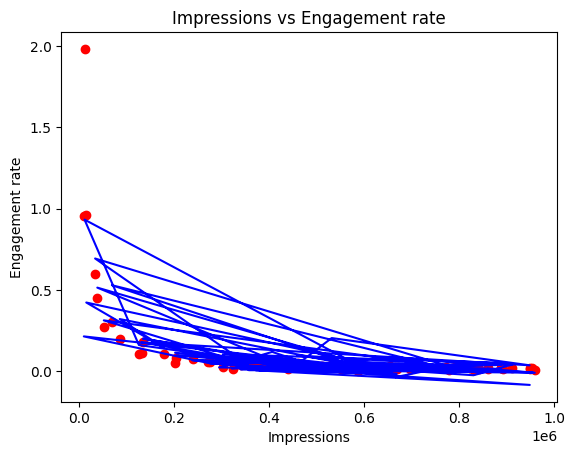

In [18]:
plt.scatter(X_test[:, 1], y_test, c='red')
plt.plot(X_test[:, 1], y_pred, c='blue')
plt.title('Impressions vs Engagement rate')
plt.xlabel('Impressions')
plt.ylabel('Engagement rate')
plt.show()

## LDA for topic extraction

### Data preparation

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
max_topics = 10
topics_per_doc = 5
vectorizer = CountVectorizer(stop_words='english')
X_vector = X_train[:, 0]
X_test_vector = X_test[:, 0]
X_vector = vectorizer.fit_transform(X_vector)
X_test_vector = vectorizer.transform(X_test_vector)

### Model Training & Topic Extraction

In [20]:
lda = LatentDirichletAllocation(n_components=max_topics, random_state=0)  # n_components is the number of topics
lda.fit(X_vector)
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['abroad' 'account' 'achiev' 'ad' 'advic' 'advisor' 'anniversari'
 'announc' 'annual' 'answer' 'anytim' 'anywher' 'app' 'appli' 'appoint'
 'approv' 'articl' 'authent' 'auto' 'autofin' 'autoloan' 'away' 'balanc'
 'bank' 'benefit' 'best' 'better' 'big' 'biometr' 'biometricauthent'
 'blog' 'book' 'bring' 'budget' 'budgettravel' 'build' 'busi'
 'businessbank' 'buy' 'cancel' 'car' 'card' 'carfin' 'carloan' 'cashback'
 'celebr' 'ceo' 'check' 'child' 'choic' 'close' 'colleg' 'collegesav'
 'come' 'comfort' 'competit' 'complex' 'connect' 'consolid' 'consult'
 'contact' 'control' 'conveni' 'cover' 'coverag' 'creat' 'credit'
 'creditcard' 'creditrepair' 'creditscor' 'custom' 'deal' 'debt' 'deduct'
 'deposit' 'design' 'digit' 'digitalbank' 'discov' 'doe' 'download'
 'dream' 'dreamvac' 'drive' 'earn' 'easi' 'educ' 'emerg' 'enhanc' 'enjoy'
 'est' 'event' 'everi' 'everyday' 'everyth' 'excit' 'expens' 'experi'
 'expert' 'famili' 'fast' 'featur' 'fee' 'financ' 'financi'
 'financialadvic' 'financialadvi

### Extracting the top 10 topics

In [21]:
identified_topics = []
identified_topics_importance = []
for topic_idx, topic in enumerate(lda.components_):
    # Sorting the indices of the topic by their corresponding weights in descending order
    top_features_indices = topic.argsort()[-topics_per_doc:][::-1]
    top_features = [(feature_names[i], topic[i]) for i in top_features_indices]

    # Extract topic names and importances separately for storage
    topic_names = [feature_name for feature_name, weight in top_features]
    topic_weights = [weight for feature_name, weight in top_features]

    # Append to your lists
    identified_topics.append(topic_names)
    identified_topics_importance.append(topic_weights)
print(identified_topics)
print(identified_topics_importance)

[['invest', 'stock', 'stockmarket', 'market', 'strategi'], ['retir', 'workshop', 'join', 'plan', 'financi'], ['vacat', 'account', 'today', 'save', 'travel'], ['check', 'bank', 'financi', 'futur', 'today'], ['homebuy', 'mortgag', 'home', 'retir', 'buy'], ['help', 'credit', 'learn', 'today', 'score'], ['tax', 'plan', 'servic', 'help', 'retir'], ['app', 'secur', 'updat', 'excit', 'today'], ['budget', 'reward', 'start', 'cashback', 'card'], ['loan', 'financ', 'rate', 'today', 'appli']]
[[33.09997995349422, 30.099999753036744, 15.099999749690621, 15.099999749690621, 15.099994377354307], [30.31235430604633, 26.099999999576458, 17.099977248730646, 16.215337054746502, 15.100235061935884], [49.09999477866534, 47.046318469896114, 35.332050003944765, 32.69227679460189, 17.59614840933387], [5.099980084358862, 5.006177287897229, 4.100092989403137, 4.099945485554677, 3.100090283506552], [49.09999744087678, 40.09999554657048, 37.09996370288978, 33.887931755108745, 33.09997778175996], [39.367999434129

### Classifying posts based on topics

In [22]:
def find_significant_topics(vector):
  doc_topic_dist = lda.transform(vector)
  significant_topics_per_doc = []
  topic_matching_threshold = 0.10

  # Iterate over each document's topic distribution
  for i, topics in enumerate(doc_topic_dist):
      # Find all topics where the contribution is greater than 10%
      significant_topics = [topic_idx for topic_idx, importance in enumerate(topics) if importance >topic_matching_threshold]
      significant_topics_per_doc.append(significant_topics)

  return significant_topics_per_doc

print(X_vector)
X_vector = find_significant_topics(X_vector)
print(X_vector)


  (0, 171)	1
  (0, 183)	1
  (0, 147)	2
  (0, 174)	1
  (0, 114)	1
  (0, 250)	1
  (0, 55)	1
  (0, 202)	1
  (0, 13)	1
  (0, 175)	1
  (0, 254)	1
  (0, 184)	1
  (0, 103)	1
  (1, 137)	1
  (1, 209)	2
  (1, 185)	1
  (1, 281)	2
  (1, 142)	1
  (1, 220)	1
  (1, 104)	1
  (1, 117)	1
  (1, 89)	1
  (1, 206)	1
  (1, 210)	1
  (2, 254)	1
  :	:
  (327, 174)	1
  (327, 114)	1
  (327, 250)	1
  (327, 55)	1
  (327, 202)	1
  (327, 13)	1
  (327, 175)	1
  (327, 254)	1
  (327, 184)	1
  (327, 103)	1
  (328, 254)	1
  (328, 220)	1
  (328, 104)	1
  (328, 117)	1
  (328, 195)	1
  (328, 132)	1
  (328, 200)	1
  (328, 194)	1
  (328, 143)	1
  (328, 187)	1
  (328, 181)	1
  (328, 160)	1
  (328, 144)	1
  (328, 111)	1
  (328, 99)	1
[[9], [1], [6], [2], [6], [6], [6], [5, 9], [0], [4, 9], [2], [6], [6], [2], [6], [6], [9], [1], [8], [6], [0], [2], [0], [4], [8], [6], [8], [4], [5], [6], [4], [7], [0], [2], [2], [6], [4], [5], [7], [8], [6], [1, 6, 9], [4], [5], [4], [4], [2], [4], [2], [3], [6], [3, 4, 9], [5], [4], [4], [9], [

### Transoforming post into labelled topics

In [23]:
# prompt: Transform sifgnificant_topics_per_doc to be a 2 dimensional array of uniform size. Each row of the variable significant_topics_per_doc becomes a row of the new list. And each column of the variable declares the indexes where the value should be 1. All the other values at these columns should be made as 0
def transform_significant_topics(significant_topics_per_doc):
  """
  Transforms the significant_topics_per_doc list into a 2D array of uniform size.
  """
  transformed_topics = np.zeros((len(significant_topics_per_doc), max_topics))
  for i, topics in enumerate(significant_topics_per_doc):
    transformed_topics[i, topics] = 1
  return transformed_topics

X_vector = transform_significant_topics(X_vector)
print(X_vector)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


### Transforming test data into labelled topics

In [24]:
X_test_vector = find_significant_topics(X_test_vector)
X_test_vector = transform_significant_topics(X_test_vector)
print(X_test_vector)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0.

### Applying regression learning on the labelled

In [25]:
regressor = LinearRegression()
regressor.fit(X_vector, y_train)

LinearRegression()

In [26]:
y_train_pred = regressor.predict(X_vector)
y_pred = regressor.predict(X_test_vector)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.07 0.01]
 [0.1  0.03]
 [0.09 0.02]
 [0.05 0.03]
 [0.07 0.45]
 [0.06 0.01]
 [0.07 0.2 ]
 [0.07 0.1 ]
 [0.06 0.96]
 [0.09 0.02]
 [0.05 0.03]
 [0.06 0.05]
 [0.09 0.02]
 [0.09 0.06]
 [0.09 0.06]
 [0.09 0.02]
 [0.08 0.05]
 [0.07 0.02]
 [0.09 0.08]
 [0.05 0.02]
 [0.08 0.02]
 [0.07 0.01]
 [0.11 0.06]
 [0.09 0.02]
 [0.05 0.3 ]
 [0.07 0.02]
 [0.1  0.03]
 [0.05 0.18]
 [0.05 0.03]
 [0.07 0.07]
 [0.05 0.08]
 [0.06 0.02]
 [0.07 0.02]
 [0.09 0.02]
 [0.08 0.  ]
 [0.09 0.08]
 [0.09 0.04]
 [0.1  0.27]
 [0.05 0.02]
 [0.09 0.03]
 [0.08 0.02]
 [0.09 0.06]
 [0.1  0.03]
 [0.09 0.95]
 [0.07 0.06]
 [0.07 0.02]
 [0.1  0.03]
 [0.09 0.02]
 [0.09 0.03]
 [0.05 0.05]
 [0.07 0.01]
 [0.06 0.08]
 [0.05 0.03]
 [0.09 0.03]
 [0.07 0.02]
 [0.08 0.02]
 [0.06 0.02]
 [0.06 0.02]
 [0.09 0.01]
 [0.07 0.02]
 [0.08 0.04]
 [0.09 0.01]
 [0.09 0.03]
 [0.06 0.03]
 [0.08 0.03]
 [0.09 0.05]
 [0.06 0.03]
 [0.09 0.02]
 [0.09 0.6 ]
 [0.08 0.04]
 [0.09 0.11]
 [0.07 1.98]
 [0.06 0.03]
 [0.07 0.02]
 [0.07 0.03]
 [0.05 0.01]
 [0.09 0.12]

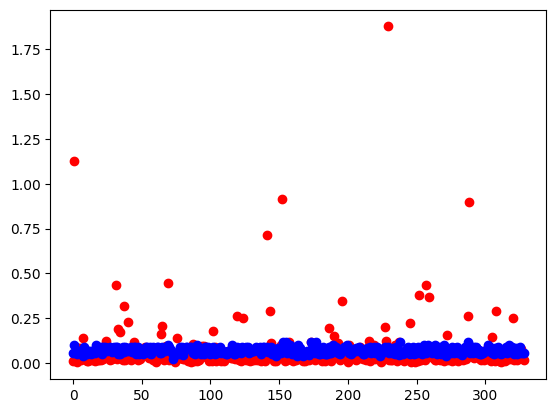

In [27]:
plt.scatter(range(0, len(y_train)), y_train, c='red')
plt.scatter(range(0, len(y_train)), regressor.predict(X_vector), c='blue')
plt.show()

In [28]:
print(X_vector)
print(len(y_train))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
329


In [29]:
print(len(identified_topics))

10


### Visualizing training data and model presictions for topics vs engagement prediction

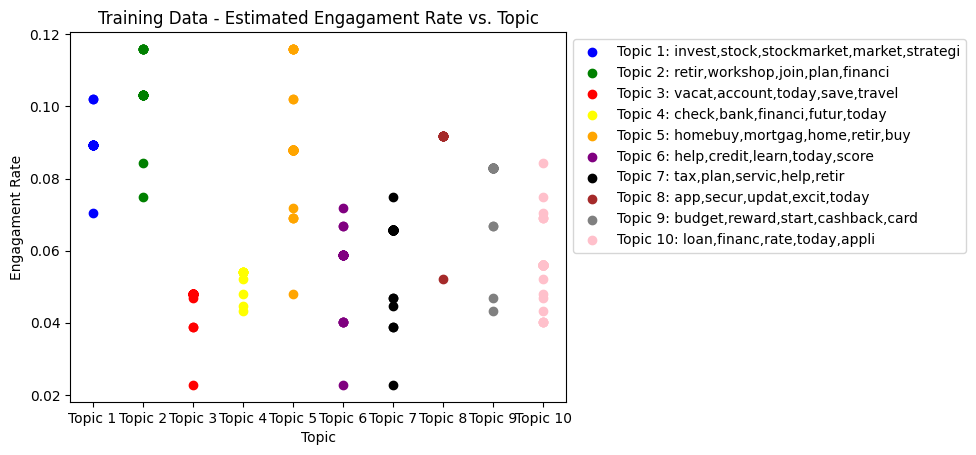

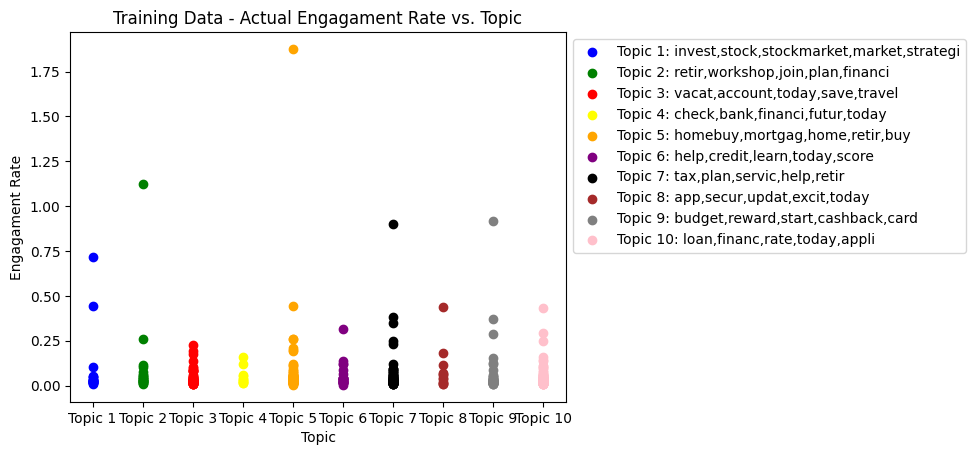

In [30]:
# Create a list of colors for each topic
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'gray', 'pink']
colors = colors[:max_topics]  # Ensure we have enough colors, or repeat them if necessary

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = y_train_pred[doc_indices]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Engagament Rate')
plt.title('Training Data - Estimated Engagament Rate vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = y_train[doc_indices]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Engagament Rate')
plt.title('Training Data - Actual Engagament Rate vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

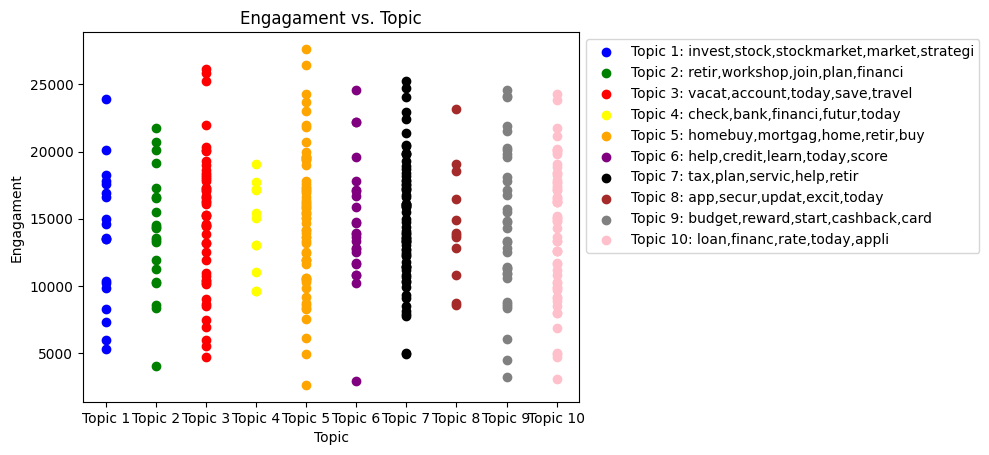

In [31]:
# Create a list of colors for each topic
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'gray', 'pink']
colors = colors[:max_topics]  # Ensure we have enough colors, or repeat them if necessary

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = X_train[doc_indices,2]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Engagament')
plt.title('Engagament vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

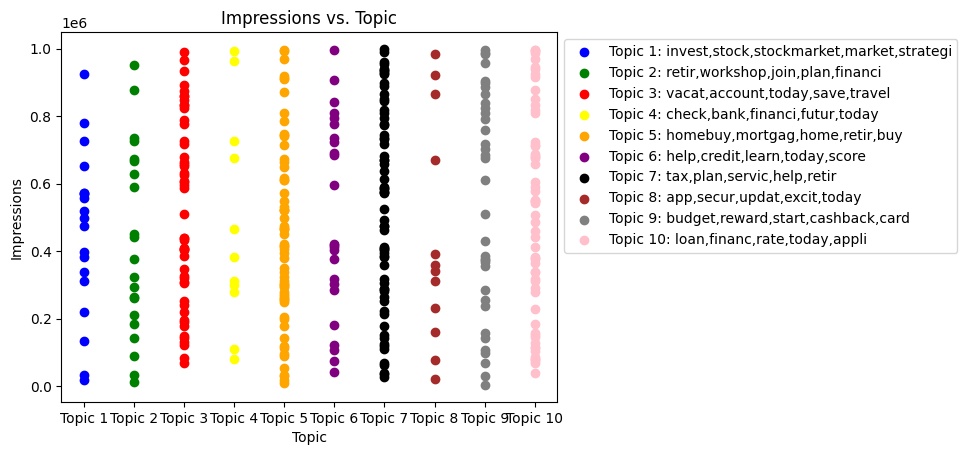

In [32]:
# Create a list of colors for each topic
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'gray', 'pink']
colors = colors[:max_topics]  # Ensure we have enough colors, or repeat them if necessary

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = X_train[doc_indices,1]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Impressions')
plt.title('Impressions vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Visualizing testing data and model presictions for topics vs engagement prediction

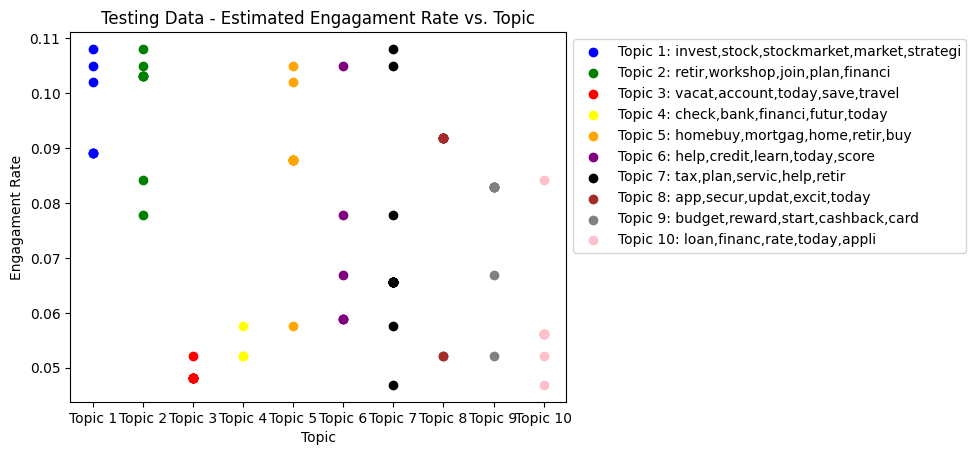

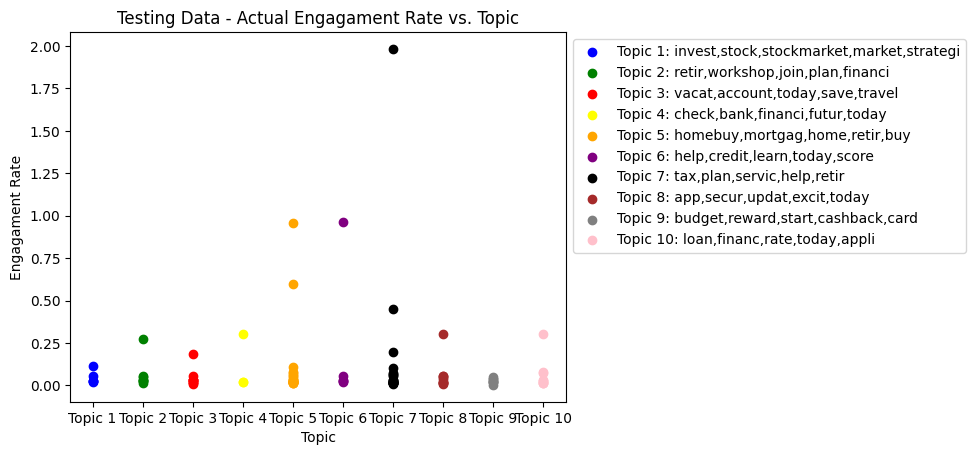

In [33]:
# Create a list of colors for each topic
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'black', 'brown', 'gray', 'pink']
colors = colors[:max_topics]  # Ensure we have enough colors, or repeat them if necessary

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_test_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = y_pred[doc_indices]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Engagament Rate')
plt.title('Testing Data - Estimated Engagament Rate vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

# Loop through each topic and plot the data points for documents associated with that topic
for i in range(max_topics):
    # Find indices of documents where the topic is applicable
    doc_indices = np.where(X_test_vector[:, i] == 1)[0]
    # Gather the metric values for these documents
    metric_values = y_test[doc_indices]
    # Create an array of the topic index to plot against the metric (for clear plotting)
    topic_index = np.full_like(metric_values, fill_value=i)
    # Plot the data points with the corresponding color
    plt.scatter(topic_index, metric_values, color=colors[i], label=f"Topic {i + 1}: {','.join(identified_topics[i])}")

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Engagament Rate')
plt.title('Testing Data - Actual Engagament Rate vs. Topic')
plt.xticks(ticks=np.arange(max_topics), labels=[f"Topic {i + 1}" for i in range(max_topics)])  # Set x-ticks to topic labels

# Add a legend to clarify colors
# Place a legend to the right of this plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()